In [1]:
# ==========================================
# 1️⃣ Import Libraries
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
data = pd.read_csv("D:\\MANIPAL_MSIS\\ML_PROJECTS\\DATA\\mall.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:, 3:].values        # Columns: Annual Income & Spending Score
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

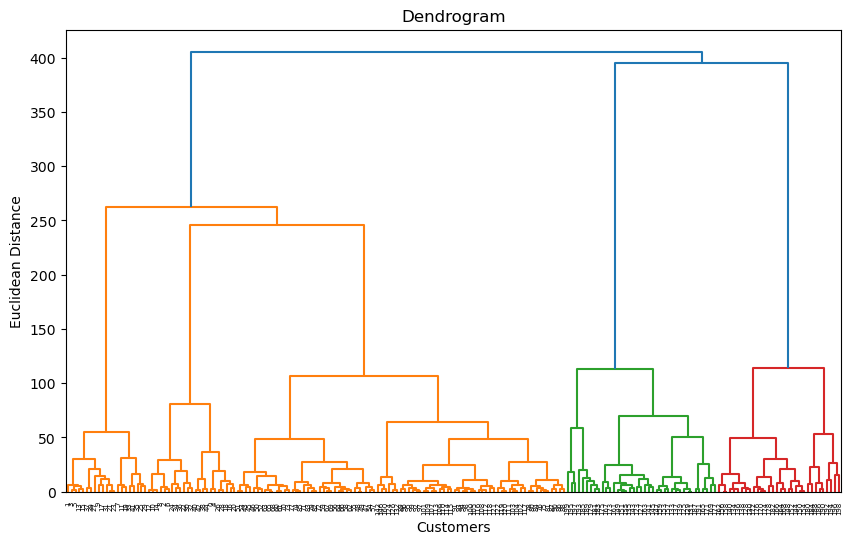

In [4]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:

linkages = ["ward", "complete", "average"]
metrics = ["euclidean", "manhattan", "cosine"]
clusters = [2, 3, 4, 5, 6]

results = []

for link in linkages:
    for metric in metrics:
        for k in clusters:
            try:
                # Ward only supports Euclidean
                if link == "ward" and metric != "euclidean":
                    continue

                model = AgglomerativeClustering(
                    n_clusters=k,
                    metric=metric,
                    linkage=link
                )
                
                labels = model.fit_predict(X)
                sil = silhouette_score(X, labels)

                results.append((link, metric, k, sil))
                print(f"Linkage={link}, Metric={metric}, Clusters={k}, Silhouette={sil:.4f}")

            except Exception as e:
                print(f"Skipped: {link}, {metric}, {k} → {e}")

Linkage=ward, Metric=euclidean, Clusters=2, Silhouette=0.3671
Linkage=ward, Metric=euclidean, Clusters=3, Silhouette=0.4618
Linkage=ward, Metric=euclidean, Clusters=4, Silhouette=0.4917
Linkage=ward, Metric=euclidean, Clusters=5, Silhouette=0.5530
Linkage=ward, Metric=euclidean, Clusters=6, Silhouette=0.5380
Linkage=complete, Metric=euclidean, Clusters=2, Silhouette=0.3671
Linkage=complete, Metric=euclidean, Clusters=3, Silhouette=0.4618
Linkage=complete, Metric=euclidean, Clusters=4, Silhouette=0.4917
Linkage=complete, Metric=euclidean, Clusters=5, Silhouette=0.5530
Linkage=complete, Metric=euclidean, Clusters=6, Silhouette=0.5437
Linkage=complete, Metric=manhattan, Clusters=2, Silhouette=0.3671
Linkage=complete, Metric=manhattan, Clusters=3, Silhouette=0.4618
Linkage=complete, Metric=manhattan, Clusters=4, Silhouette=0.3672
Linkage=complete, Metric=manhattan, Clusters=5, Silhouette=0.4432
Linkage=complete, Metric=manhattan, Clusters=6, Silhouette=0.4491
Linkage=complete, Metric=cosin

In [10]:
# ==========================================
# 6️⃣ Find Best Hyperparameters Based on Silhouette Score
# ==========================================
best = sorted(results, key=lambda x: x[3], reverse=True)[0]

best_linkage = best[0]
best_metric = best[1]
best_clusters = best[2]
best_score = best[3]

print("\n================ BEST CONFIGURATION ================")
print(f"Best Linkage: {best_linkage}")
print(f"Best Metric: {best_metric}")
print(f"Best Clusters: {best_clusters}")
print(f"Best Silhouette Score: {best_score}")
print("====================================================")


================ BEST CONFIGURATION ================
Best Linkage: ward
Best Metric: euclidean
Best Clusters: 5
Best Silhouette Score: 0.5529945955148897


In [13]:
final_hc = AgglomerativeClustering(
    n_clusters=best_clusters,
    metric=best_metric,
    linkage=best_linkage
)

y_hc = final_hc.fit_predict(X)
y_hc


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

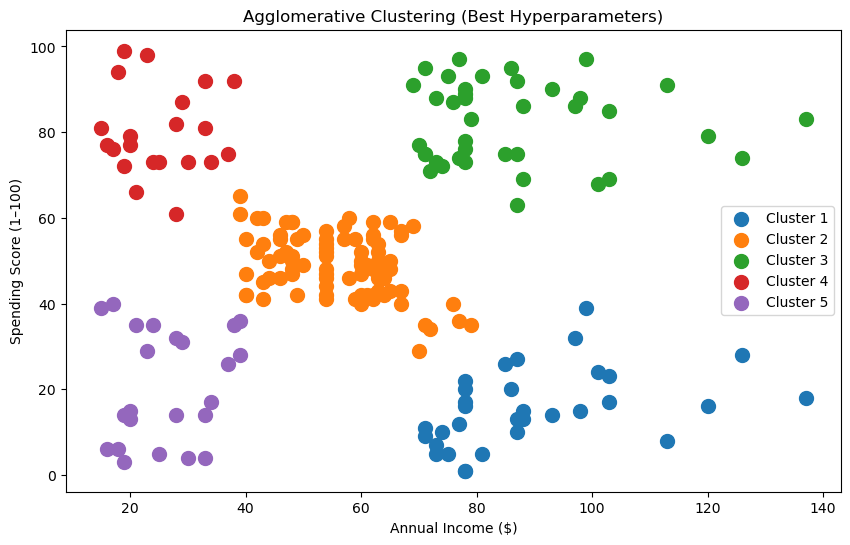

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, label='Cluster 4')

# For 5 clusters scenario
if best_clusters > 4:
    plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, label='Cluster 5')

plt.title('Agglomerative Clustering (Best Hyperparameters)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()